## Loading packages and data

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
!pip install missingno
import missingno as msno
from google.colab import files
!pip install xlrd
import xlrd
!pip install pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = files.urllib.request.urlretrieve('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls', filename=None)[0]
df = pd.read_excel(data, encoding = 'utf-8')

## EDA

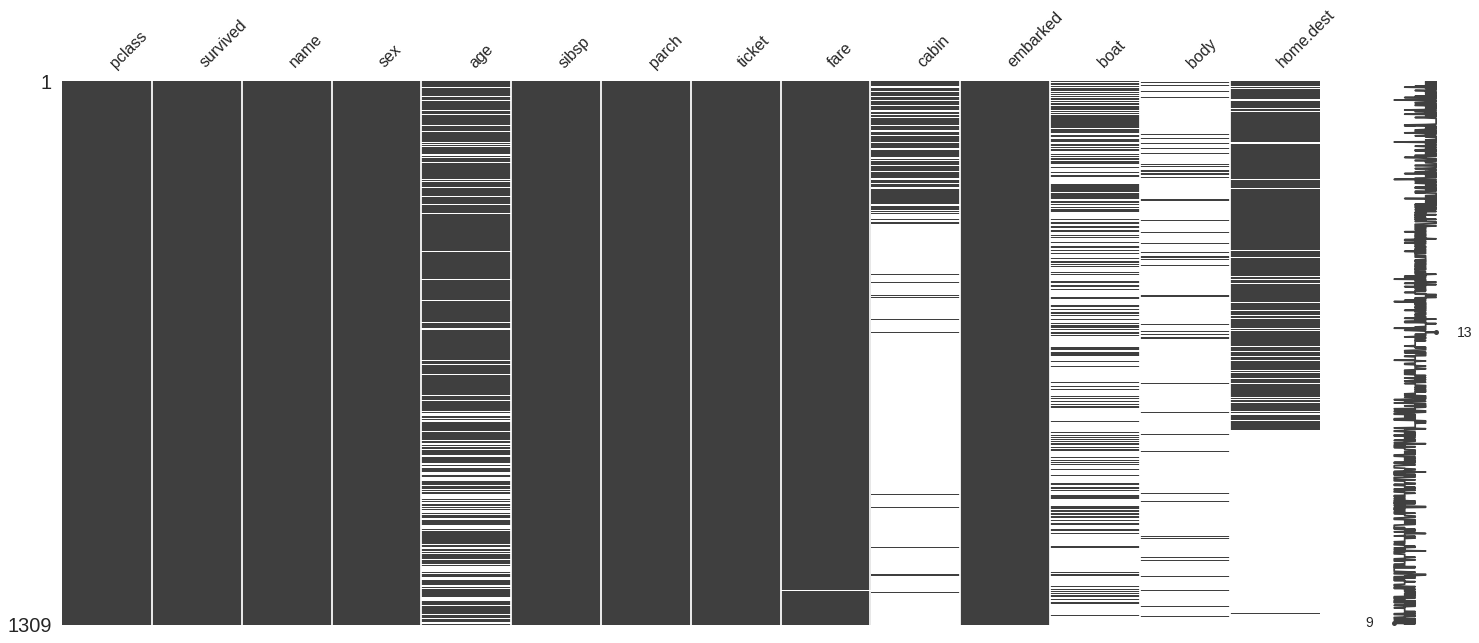

In [31]:
msno.matrix(df)
plt.show()

So, nans that presented in features body and cabin seem to be omitted by droping this features. For other features with nans let's look a bit closer.

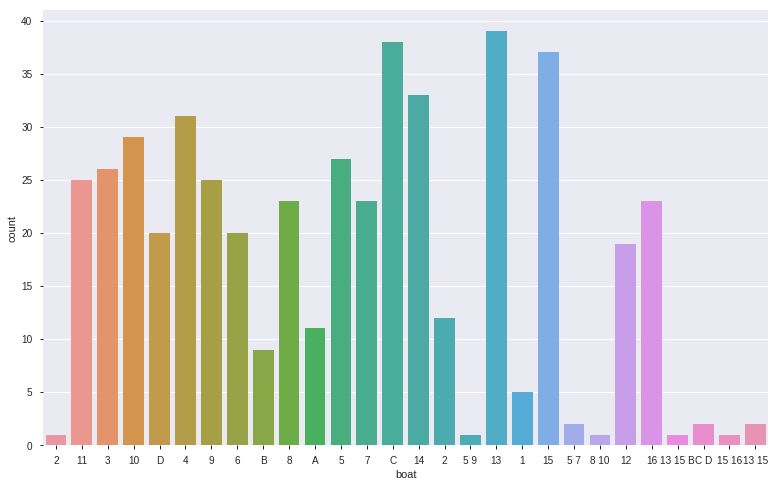

In [29]:
plt.figure(figsize=(13, 8))
sns.countplot(df.boat)
plt.show()

Feature boat has very big range of classes therefore it would be unfair to impute them by mode

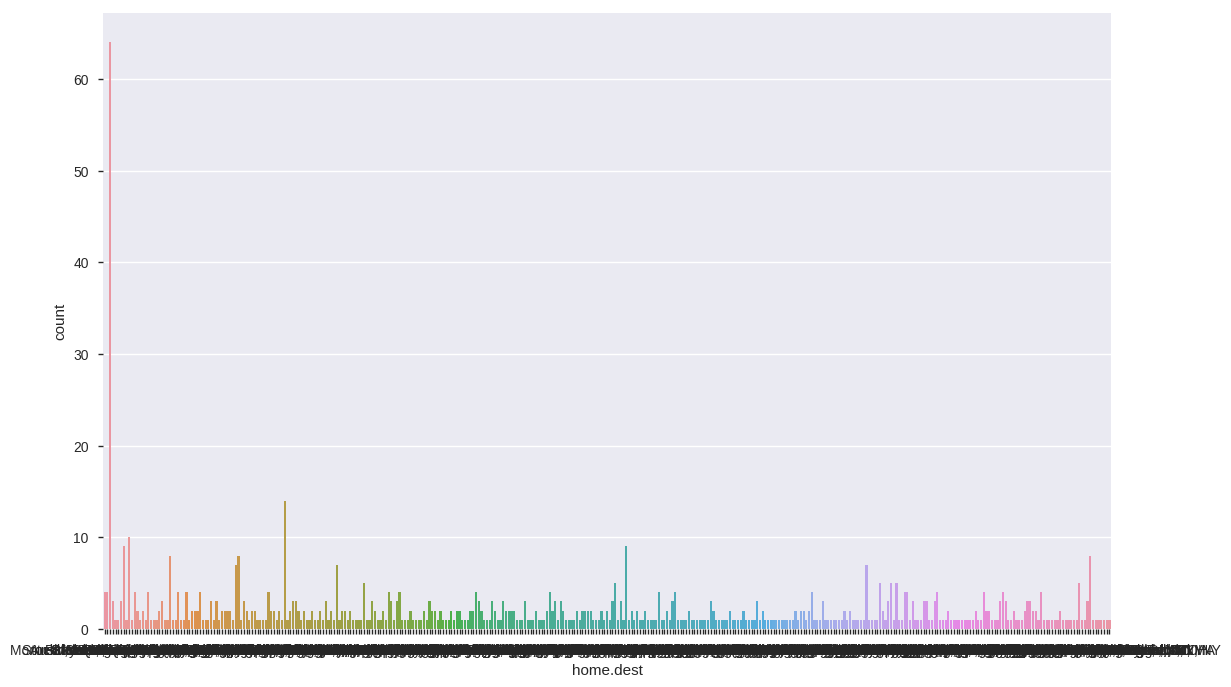

In [18]:
plt.figure(figsize=(13, 8))
sns.countplot(df['home.dest'])
plt.show()

In [19]:
df['home.dest']

0                             St Louis, MO
1          Montreal, PQ / Chesterville, ON
2          Montreal, PQ / Chesterville, ON
3          Montreal, PQ / Chesterville, ON
4          Montreal, PQ / Chesterville, ON
5                             New York, NY
6                               Hudson, NY
7                              Belfast, NI
8                      Bayside, Queens, NY
9                      Montevideo, Uruguay
10                            New York, NY
11                            New York, NY
12                           Paris, France
13                                     NaN
14                           Hessle, Yorks
15                            New York, NY
16                            Montreal, PQ
17                            Montreal, PQ
18                                     NaN
19                            Winnipeg, MN
20                            New York, NY
21                            New York, NY
22                            New York, NY
23         

The same thing we see in this feature and probably it'd be better to omit it.